# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

In [3]:
n_box = 100 # number of loot box a user buys
p_elixir = .15 # probability of a loot box containing elixir
print(f'The user is expected to get {n_box * p_elixir} elixirs if he buys {n_box} loot boxes.')

The user is expected to get 15.0 elixirs if he buys 100 loot boxes.


<span style="color:blue">**My response:** The user is expected to get 15 elixirs if he buys 100 loot boxes.</span>

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

In [10]:
# Import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

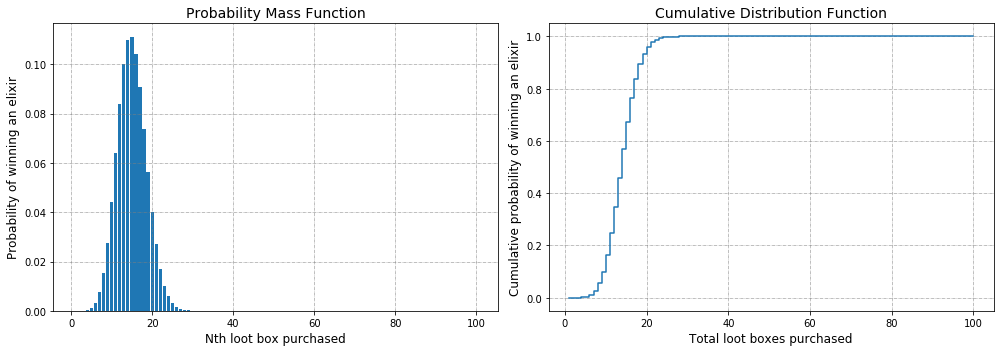

In [60]:
# Plot probability mass function (pmf) and cumulative distribution function (cdf)

elixir_binom = stats.binom(n_box, p_elixir)  # binomial
nth_box = np.linspace(1, n_box, 100)         

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot the probability mass function: probability of the nth loot box contain an elixir.
ax1.bar(nth_box, elixir_geom.pmf(nth_box))
ax1.bar(elixir_prob, elixir_binom.pmf(nth_box))
ax1.set_xlabel('Nth loot box purchased', fontsize=12)
ax1.set_ylabel('Probability of winning an elixir', fontsize=12)
ax1.set_title('Probability Mass Function', fontsize=14)
ax1.grid(True, color='grey', linestyle='-.', linewidth=0.5)

# Plot the commulative distribution function: probability of an elixir in or before the n_th loot box purchased.
ax2.step(elixir_prob, elixir_binom.cdf(nth_box))
ax2.set_xlabel('Total loot boxes purchased', fontsize=12)
ax2.set_ylabel('Cumulative probability of winning an elixir', fontsize=12)
ax2.set_title('Cumulative Distribution Function', fontsize=14)
ax2.grid(True, color='grey', linestyle='-.', linewidth=0.5)

plt.tight_layout()
plt.show();

In [69]:
# Calculate the number of boxes that a user has to buy to ensure a 99% chance of getting an elixir
box_buy = 0 # Start from buying 0 boxes
prob_threshold = .99 # set the threshold to be 99%
while elixir_dist.cdf(box_buy) <= prob_threshold:
    box_buy += 1
print(f'It is very unlikely for a user to buy {box_buy} boxes and not get at least one elixir.')

It is very unlikely for a user to buy 24 boxes and not get at least one elixir.


<span style="color:blue">**My response**: There is no guarantee for a user to get elixir. However, a user is very likely to get elixir before the 24th loot box he/she buys.</span>

In fact, this is actually a geometric distribution problem, which discribes the probability of the first success after certain number of failures.

**Approach 2 - Geometric Distribution**

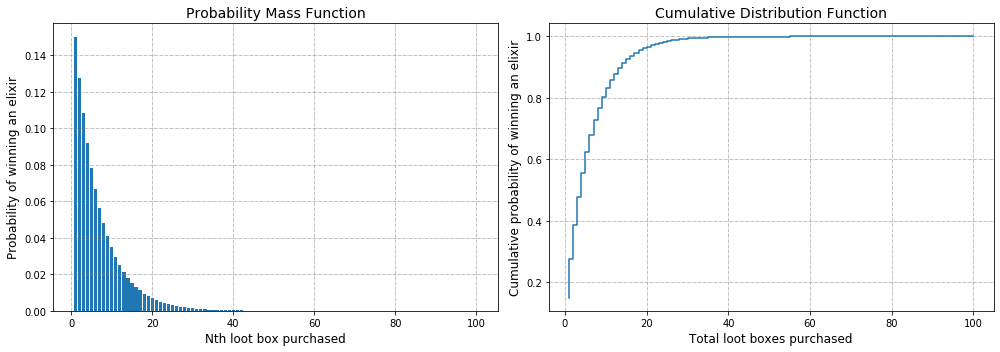

In [66]:
elixir_geom = stats.geom(p_elixir) # Note that p_elixir = 0.15

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot the probability mass function: probability of the nth loot box contain the first elixir.
ax1.bar(nth_box, elixir_geom.pmf(nth_box))
ax1.set_xlabel('Nth loot box purchased', fontsize=12)
ax1.set_ylabel('Probability of winning an elixir', fontsize=12)
ax1.set_title('Probability Mass Function', fontsize=14)
ax1.grid(True, color='grey', linestyle='-.', linewidth=0.5)

# Plot the commulative distribution function: probability of the 1st elixir in or before the n_th loot box purchased.
ax2.step(nth_box, elixir_geom.cdf(nth_box))
ax2.set_xlabel('Total loot boxes purchased', fontsize=12)
ax2.set_ylabel('Cumulative probability of winning an elixir', fontsize=12)
ax2.set_title('Cumulative Distribution Function', fontsize=14)
ax2.grid(True, color='grey', linestyle='-.', linewidth=0.5)

plt.tight_layout()
plt.show();

In [70]:
# Calculate the number of boxes that a user has to buy to ensure a 99% chance of getting an elixir
box_buy = 0 # Start from buying 0 boxes
prob_threshold = .99 # set the threshold to be 99%
while elixir_geom.cdf(box_buy) <= prob_threshold:
    box_buy += 1
print(f'It is very unlikely for a user to buy {box_buy} boxes and not get one elixir.')

It is very unlikely for a user to buy 29 boxes and not get one elixir.


#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

<span style="color:blue">**My response:** X is a discrete variable because it is <em>countable</em>. X is also a random variable because getting an elixir does not increase or decrease the user's chance of getting another (independence).</span>

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

<span style="color: blue">**My response**: X is binomial distribution. Because:</span>
1. <span style="color: blue">The probablity for an box to contain an elixir is known (success rate): 15%</span>
2. <span style="color: blue">The number of box to purchase is known (number of trials): 100</span>
3. <span style="color: blue">The chance of getting one elixir does not affect that of getting the next elixir.</span>

3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [40]:
chance_of_get_20_more = 1 - sum(elixir_dist.pmf(i) for i in range(0, 21))
print(f'If a user earns 100 loot boxes, the chance tht a user gets 20 elixirs\
is {round(chance_of_get_20_more*100, 2)}%.')

If a user earns 100 loot boxes, the chance tht a user gets 20 elixirsis 6.63%.


<span style="color:blue">**My response:** If a user earns 100 loot boxes, the chance that a user gets 20 elixirs is 6.63%.</span>

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [9]:
# Show your work; leave your answer in a comment.
chance_of_get_20_more = 1 - elixir_stats.cdf(20)
print(f'If a user earns 100 loot boxes, the chance that a user gets more than 20 elixirs is {chance_of_get_20_more}')

If a user earns 100 loot boxes, the chance that a user gets more than 20 elixirs is 0.06631976581888166


<span style="color:blue">**My response:** If a user earns 100 loot boxes, the chance that a user gets 20 elixirs is 6.63%.</span>

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

<span style="color:blue">**My response:** Not very high. If there are 100 users who buy 100 loot boxes, about 6 or 7 of them would get more than 20 elixirs.</span>

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

<span style="color:blue">Poisson distribution is best suited for Y, because:</span>
1. <span style="color:blue">We are investigate the success rate within certain period of time: number of box purchased per person (buy = success).</span>
2. <span style="color:blue">The average success rate is known.</span>

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [71]:
# Calculation
rev_target = 500_000
box_price = 1
box_per_user = 2.7
rev_per_user = box_price * box_per_user
n_user = rev_target / box_per_user
print(f'At least {round(n_user)} users would need to be on your platform for revenue to be at least $500_000')

At least 185185 users would need to be on your platform for revenue to be at least $500_000


<span style="color:blue">**My response:**: At least <strong>186,000</strong> users would need to be on your platform for revenue to be at least $500,000.</span>

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

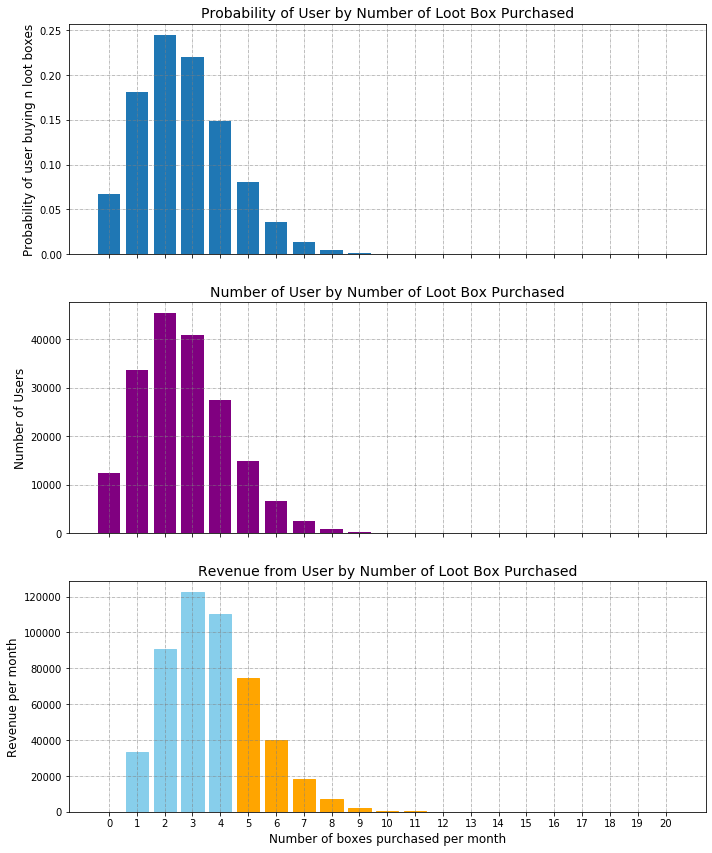

In [106]:
# Calculate the probability of a user who buys 0 to 20 boxes during the game last month
user_poisson = stats.poisson(box_per_user)
n_box = np.linspace(0, 20, 21)

fit, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot the probability of a user who buys 0 to 20 boxes during the game last month
axes[0].bar(n_box, user_poisson.pmf(n_box))
axes[0].set_ylabel('Probability of user buying n loot boxes', fontsize=12)
axes[0].set_title('Probability of User by Number of Loot Box Purchased', fontsize=14)
axes[0].set_xticks(n_box)
axes[0].grid(True, color='grey', linestyle='-.', linewidth=0.5)

# Plot the distribution of users who bought 0 to 20 boxes during the game last month
user_dist = user_poisson.pmf(n_box)*n_user
axes[1].bar(n_box, user_dist, color='purple')
axes[1].set_ylabel('Number of Users', fontsize=12)
axes[1].set_title('Number of User by Number of Loot Box Purchased', fontsize=14)
axes[1].set_xticks(n_box)
axes[1].grid(True, color='grey', linestyle='-.', linewidth=0.5)

# Plot the revenue from users who bought 0 to 20 boxes during the game last month
rev_dist = user_dist * n_box * box_price
bars = axes[2].bar(n_box, rev_dist, color='green')
for i, bar in enumerate(bars):
    if i < 5:
        bar.set_color('skyblue')
    else:
        bar.set_color('orange')
axes[2].set_xlabel('Number of boxes purchased per month', fontsize=12)
axes[2].set_ylabel('Revenue per month', fontsize=12)
axes[2].set_title('Revenue from User by Number of Loot Box Purchased', fontsize=14)
axes[2].set_xticks(n_box)
axes[2].grid(True, color='grey', linestyle='-.', linewidth=0.5)

plt.tight_layout()
plt.show();

In [109]:
# Calculate the revenue from high value user (user with minimum purchase of 5 box) last month
hvu_min_purchase = 5
hvu_rev = sum(rev_dist[hvu_min_purchase:])
print(f'The revenue from High Value User is ${int(round(hvu_rev))}.')

# Calculate the revenue from low value user (user with minimum purchase of 5 box) last month
lvu_rev = sum(rev_dist[:hvu_min_purchase])
print(f'The revenue from Low Value User is ${int(round(lvu_rev))}.')

The revenue from High Value User is $142954.
The revenue from Low Value User is $357046.


<span style="color:blue">**My response:**</span> 
1. <span style="color:blue">The revenue from High Value User is \$142954.</span>
2. <span style="color:blue">The revenue from Low Value User is \$357046.</span> 

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

<span style="color:blue">**My response:**</span> 
1. <span style="color:blue">**mean**: on average, each purson purchased between 2.7 boxes.</span>
2. <span style="color:blue">**median**: half of the people purchased 3 or more loot boxes.</span>
3. <span style="color:blue">**mode**: users who purchased 3 boxes have the largest population, about 12,000.</span>

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [23]:
import numpy as np

In [110]:
# Experiment on how many boxes a user has to open to obtain the first elixir
# input: integer - number of trials
# output: list of the number of attempts for each trial
def experiment(n):
    trials = []
    for _ in range(n):
        n_trial = 0
        n_box_open = 0
        while n_box_open <= 85:
            n_box_open = np.random.randint(1,101)
            n_trial += 1
        trials.append(n_trial)
    return trials

In [111]:
# Try 100,000 trials using the experiment function
trials = experiment(100000)
first_elixir = np.array(trials)

# Construct the the keys and values to store the percentile data
pctl_keys = [5, 25, 50, 75, 95]
pctl_values = [np.percentile(first_elixir, key) for key in pctl_keys]
pctl = dict(zip(pctl_keys, pctl_values))
print(pctl)

{5: 1.0, 25: 2.0, 50: 5.0, 75: 9.0, 95: 19.0}


In [26]:
for key, value in pctl.items():
    print(f'{key}th percentile: open {value} boxes before getting 1st elixir')

5th percentile: open 1.0 boxes before getting 1st elixir
25th percentile: open 2.0 boxes before getting 1st elixir
50th percentile: open 5.0 boxes before getting 1st elixir
75th percentile: open 9.0 boxes before getting 1st elixir
95th percentile: open 19.0 boxes before getting 1st elixir


**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

<span style="color:blue">**My response:** Dictionary would be the best way to store this data for the following since the data is in key (categorical) /value (numerical) pair.</span>

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

<span style="color:blue">**My response:**</span>
<span style="color:blue">I believe the following metrics are important to measure:</span>
1. <span style="color:blue">The total revenue (increase or decrease).</span>
2. <span style="color:blue">The number of users (increase or decrease).</span>
3. <span style="color:blue">The average number of boxes each user buys (increase or decrease).</span>
4. <span style="color:blue">The distribution of revenue from high value users and low value users.</span>

<span style="color:blue">Item 1 measures the overall impact to the game income. Items 2-4 explains the changes (i.e., whether the revenue increase is due to more new users or existing users spending more or both).</span>